<a href="https://colab.research.google.com/github/Suvarnaa13/FMML-LAB-1/blob/main/FMML_Module_9_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Kushagra Agarwal

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

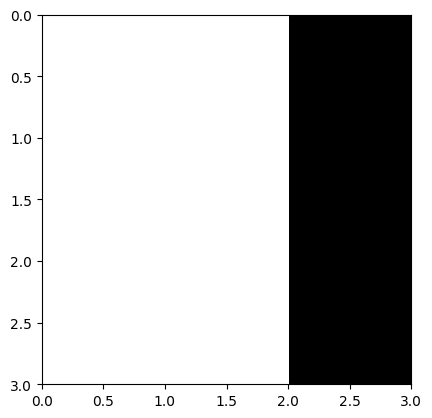

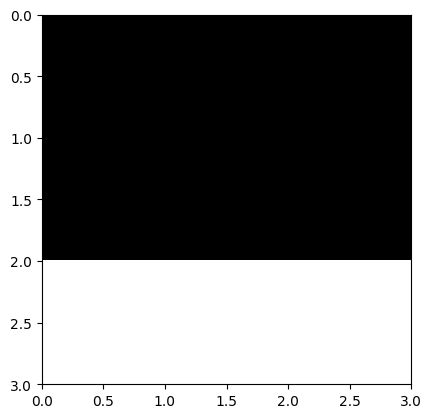

In [3]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [4]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [5]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [6]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [7]:
# Our original lotus image
image = cv2.imread('/content/grid1 (1).jpg', 0)

filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

out1 = apply_conv(image, filter, padding=0, stride=1)

filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

out2 = apply_conv(image, filter, padding=0, stride=1)

TypeError: expected np.ndarray (got NoneType)

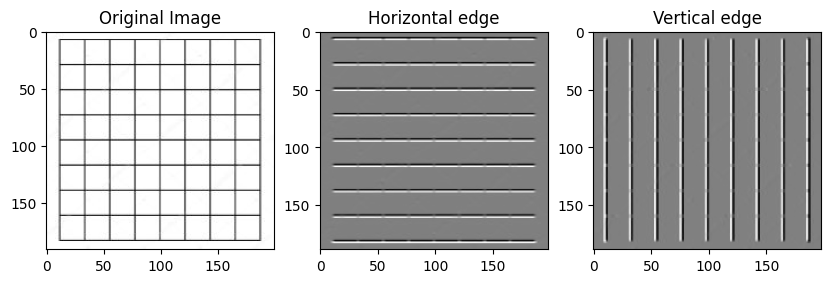

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,3,1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax = fig.add_subplot(1,3,2)
ax.set_title('Horizontal edge')
ax.imshow(out1, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.imshow(out2, cmap='gray')
ax.set_title('Vertical edge')
plt.show()


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [1]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:04<00:00, 41571996.83it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [4]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [5]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [6]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [8]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [9]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [10]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/5, Loss: 0.0129, Accuracy: 38.9300
Epoch 2/5, Loss: 0.0095, Accuracy: 57.1440
Epoch 3/5, Loss: 0.0079, Accuracy: 64.4120
Epoch 4/5, Loss: 0.0067, Accuracy: 69.8700
Epoch 5/5, Loss: 0.0058, Accuracy: 73.7420


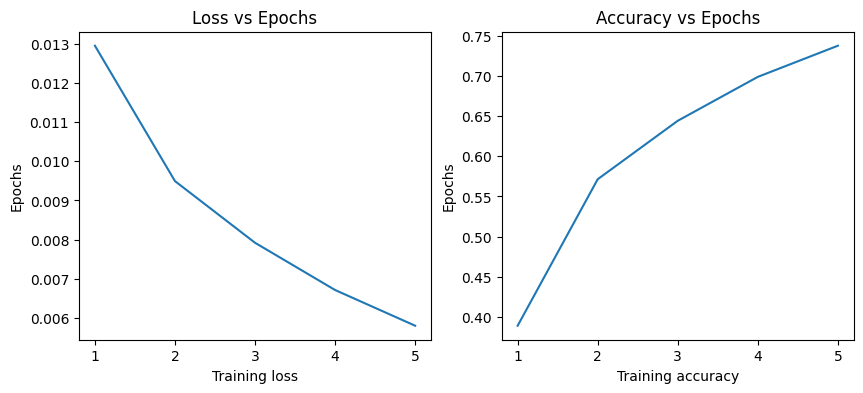

In [11]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [12]:
# Accuracy on test data after training
test_model(model, testloader)

Accuracy of the network: 68 %


## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?


**1. Answer:**
--


**Spatial Hierarchies:** CNNs are designed to preserve the spatial structure of the input data. They use convolutional layers to detect patterns at different spatial scales, allowing them to capture hierarchical features in images. ANNs, on the other hand, treat input data as a flat vector, ignoring spatial relationships.

**Feature Reuse:** CNNs employ weight sharing through convolutional filters, which allows them to reuse learned features across different parts of the image. This significantly reduces the number of parameters needed to train the network compared to ANNs, making CNNs more efficient and less prone to overfitting.

**Translation Invariance:** CNNs are inherently translation-invariant, meaning they can recognize patterns regardless of their position in the image. This property is achieved through the use of shared weights in convolutional layers. ANNs lack this property and require extensive data augmentation or additional layers to achieve translation invariance.

**Local Connectivity:** CNNs exploit local connectivity by connecting each neuron to a small, localized region of the input data. This allows them to capture local patterns efficiently. ANNs, being fully connected, have to learn all possible connections, leading to increased computational complexity and overfitting.

**Parameter Sharing:** CNNs share parameters across the entire input image, which makes them well-suited for tasks where the spatial location of features is irrelevant. This parameter sharing significantly reduces the number of parameters in the network, making CNNs more efficient and easier to train.

**Better Performance:** CNNs have shown superior performance compared to ANNs in image-related tasks, achieving state-of-the-art results in tasks like image classification, object detection, and segmentation.

**Pre-trained Models:** Pre-trained CNN models (such as VGG, ResNet, or Inception) are readily available. These models are trained on large-scale image datasets (like ImageNet) and can be fine-tuned on specific tasks with smaller datasets, providing a good starting point for image classification tasks.

Overall, CNNs are specifically designed to handle spatial data like images, and their architecture is optimized for capturing local patterns, hierarchical features, and translation invariance, making them the preferred choice for image classification tasks.








**2.Answer:**
--
**Split the Data:** Ensure you have separate training, validation, and test sets. This helps prevent overfitting and gives a reliable estimate of the model's performance.

**Define Hyperparameters:** Choose a range of values to test for each hyperparameter.

 For example:
Number of epochs: 20, 30, 40
Optimizers: Adam, SGD
Learning rates: 0.001, 0.01, 0.1

**Create a Grid for Hyperparameter Search:** You can use a grid search or random search to find the best combination of hyperparameters.

**Train the Model:** For each combination of hyperparameters, train the model on the training set and validate on the validation set.

**Select the Best Model:** Choose the model with the highest performance on the validation set.

**Evaluate on Test Set:** Finally, evaluate the best model on the test set to get the final accuracy.


In [16]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define CNN model
def create_model(optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Split the data into train, validation, and test sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define hyperparameters
epochs = [20, 30, 40]
optimizers = ['adam', 'sgd']
learning_rates = [0.001, 0.01, 0.1]

best_accuracy = 0
best_model = None
best_hyperparameters = {}

# Grid search for best hyperparameters
for epoch in epochs:
    for optimizer in optimizers:
        for lr in learning_rates:
            model = create_model(optimizer, lr)
            history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val), verbose=0)
            val_accuracy = history.history['val_accuracy'][-1]
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_model = model
                best_hyperparameters = {'epochs': epoch, 'optimizer': optimizer, 'learning_rate': lr}

# Evaluate the best model on test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:", best_hyperparameters)


KeyboardInterrupt: 

**3.Answer:**
--
This code modifies the CNN architecture to have only one convolutional layer followed by max pooling and then two fully connected layers. After making this change, we'll see how the model performs compared to the previous version.

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define CNN model with one convolutional layer
def create_model(optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Split the data into train, validation, and test sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define hyperparameters
epochs = [20, 30, 40]
optimizers = ['adam', 'sgd']
learning_rates = [0.001, 0.01, 0.1]

best_accuracy = 0
best_model = None
best_hyperparameters = {}

# Grid search for best hyperparameters
for epoch in epochs:
    for optimizer in optimizers:
        for lr in learning_rates:
            model = create_model(optimizer, lr)
            history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val), verbose=0)
            val_accuracy = history.history['val_accuracy'][-1]
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_model = model
                best_hyperparameters = {'epochs': epoch, 'optimizer': optimizer, 'learning_rate': lr}

# Evaluate the best model on test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:", best_hyperparameters)


**4. Answer:**
--
some reasons why Softmax activation might not be used in the last layer:

**Binary Classification:** If the task is binary classification (two classes), we typically use a single neuron with a sigmoid activation function. Sigmoid function squashes the output between 0 and 1, representing the probability of belonging to one of the two classes.

**Multi-class Classification:** If the task is multi-class classification with more than two classes, Softmax activation is often used in the last layer. It's used to normalize the output into a probability distribution over multiple classes, ensuring that the sum of probabilities for all classes is 1.

**Regression:** If the task is regression, where the output is a continuous value, the last layer might have a linear activation (no activation function) or a different activation function like ReLU depending on the nature of the output.

**Custom Output Requirement:** In some cases, we might need a custom output format. For example, if we're dealing with object detection, the output layer might consist of multiple neurons with different activations and a custom loss function.

**Loss Function Compatibility:** The choice of activation function in the output layer is often tied to the loss function. For example, if we're using categorical cross-entropy loss, Softmax activation is typically used. But if we're using binary cross-entropy loss, Sigmoid activation is more appropriate.

In summary, the choice of activation function in the last layer of a CNN depends on the specific requirements of the task, the nature of the output, and the compatibility with the loss function being used. Softmax activation is just one of the options, and it's not always the best choice.






